## Author : Abdallah Mohamed Saad
### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data cleaning

Drop needless columns

In [7]:
df = df.drop(['Country', 'Postal Code'], axis=1)
df = df.drop_duplicates()

grouping data

In [8]:
category_group = df.groupby(['Category', 'Sub-Category'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
segment_group = df.groupby(['Segment'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
region_group = df.groupby(['Region'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
state_group = df.groupby(['State'])['Sales', 'Quantity', 'Profit'].mean().reset_index()

C:\Users\beel\AppData\Local\Temp\ipykernel_53540\184194136.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_group = df.groupby(['Category', 'Sub-Category'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
C:\Users\beel\AppData\Local\Temp\ipykernel_53540\184194136.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  segment_group = df.groupby(['Segment'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
C:\Users\beel\AppData\Local\Temp\ipykernel_53540\184194136.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_group = df.groupby(['Region'])['Sales', 'Quantity', 'Profit'].mean().reset_index()
C:\Users\beel\AppData\Local\Temp\ipykernel_53540\184194136.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to

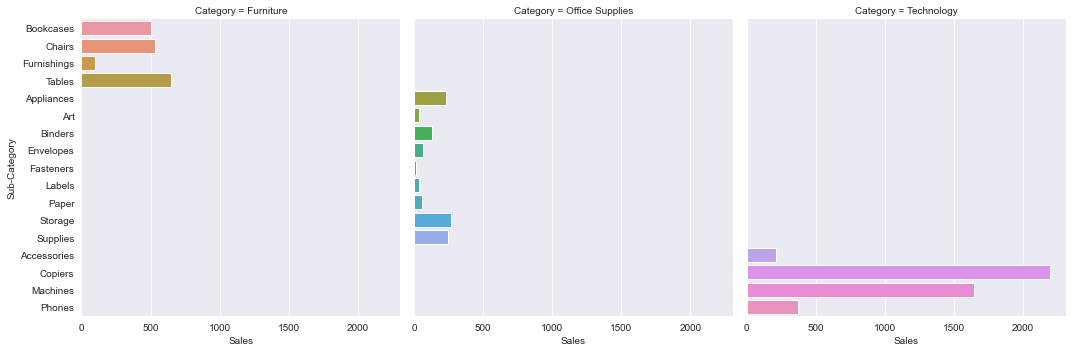

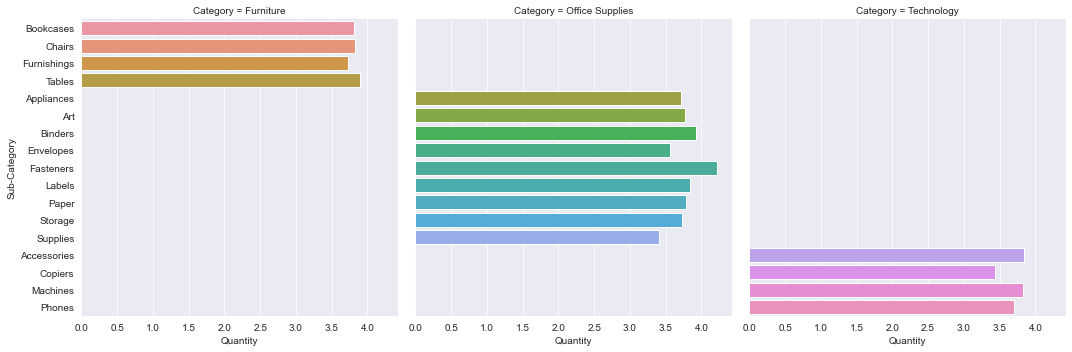

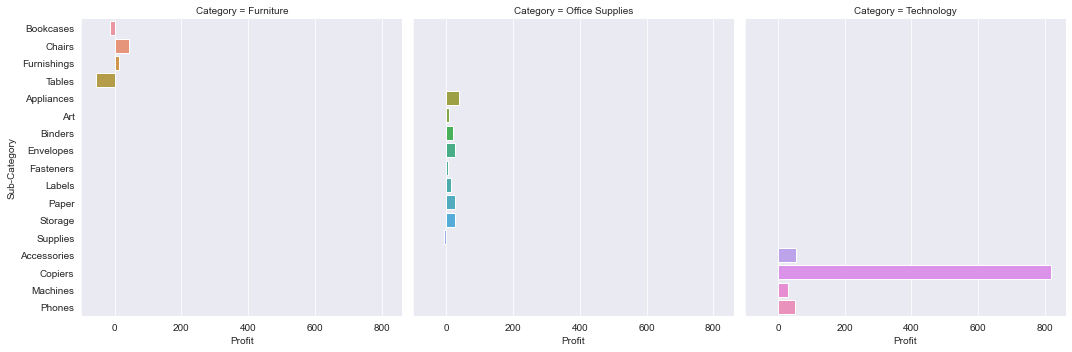

In [10]:
x = sns.catplot(x="Sales",
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity",
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit",
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

From these graphs, we can conclude that

In technology category, Sales are more than other two category.
In technology category, Copiers and Machines are sold the most.
Quantity of products are almost sold in equal amount in each category.
In Furniture category, Bookcases and Tables are incurring a lose and Furnishing has a very minimal profit.
In Office Supplies category, there is a very minimal profit in all sub-categories.
In technology category, Copiers provide the most profit among all others.

Text(0.5, 1.0, 'Segment-Wise Profit Gained')

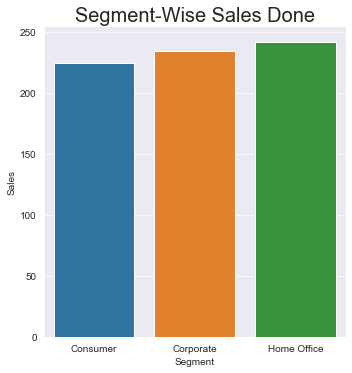

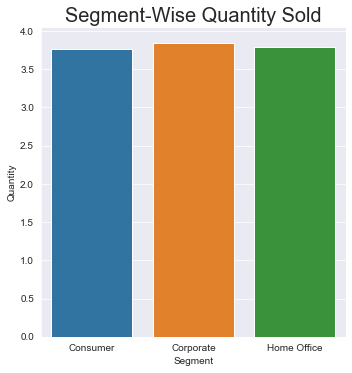

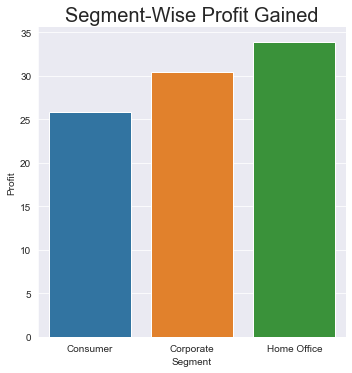

In [13]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
plt.title("Segment-Wise Sales Done", fontsize=20)
y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
plt.title("Segment-Wise Quantity Sold", fontsize=20)
z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
plt.title("Segment-Wise Profit Gained", fontsize=20)

From these graphs, we can conclude that

All types of Segments have shown almost same number of sales.
All types of Segments have shown almost same number of quantity sold.
Profit gained in the Home Office segment is higher comparing other two segments and Consumer Segment being the lowest.

Text(0.5, 1.0, 'Region-Wise Profit Gained')

<Figure size 1008x504 with 0 Axes>

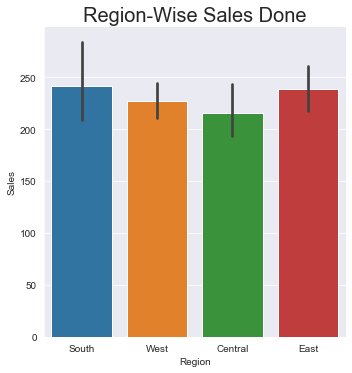

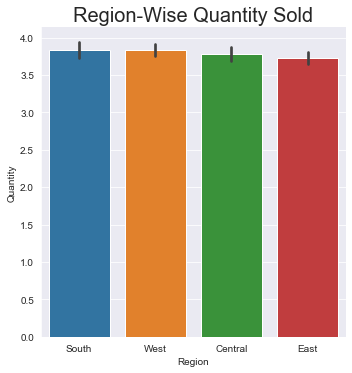

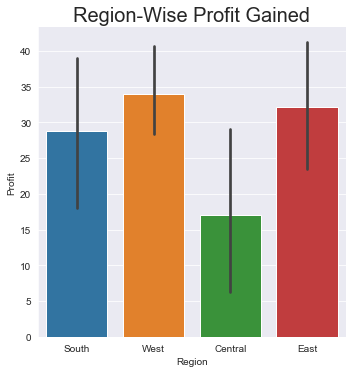

In [15]:
fig = plt.figure(figsize=(14, 7))
a = sns.catplot(x='Region',
                y='Sales',
                data=df,
                kind='bar')
plt.title("Region-Wise Sales Done", fontsize=20)

b = sns.catplot(x='Region',
                y='Quantity',
                data=df,
                kind='bar')
plt.title("Region-Wise Quantity Sold", fontsize=20)

c = sns.catplot(x='Region',
                y='Profit',
                data=df,
                kind='bar')
plt.title("Region-Wise Profit Gained", fontsize=20)

From these graphs, we can conclude that

Sales are more in Southern and Eastern part of US.
Quantity of products sold in all the regions are almost same and not much of difference.
Profit gained in Western part of US is  higher followed by Eastern part, Southern part then Central part of US.

In [16]:
sorted_sales = state_group.sort_values(['Sales'],
                                       ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'],
                                          ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'],
                                        ascending=False)[:10]

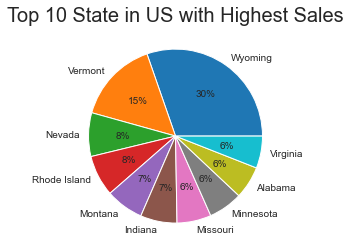

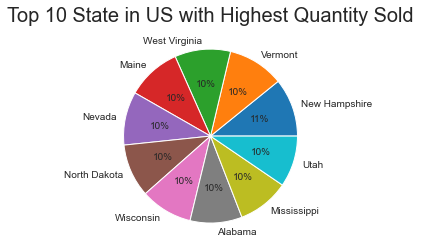

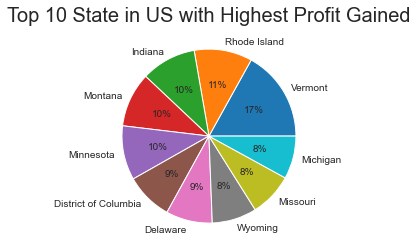

In [17]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()

Business problems that can be derived by looking into the data?
How much is the sales, profit and quantity sold varies region-wise, state-wise and segment-wise, category-wise?
Which category of items gives the more profit and sold more?
Which type of mode is suitable for more profit?
Which country has the highest profit?
Which region has the highest sales and profit?


From all the EDAs done above, we can infer that

Technology Category are in demand offering the highest sales and profits
Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
Wyoming State have highest sales and Vermont State have the highest Profit